To produce the figures, just run sequentially each of the cells. The first section is dedicated to the definitions of two classes that I used to encapsulate the data and perform some preliminary tasks before plotting the results. The two last sections are to produce the two figures, the first one about the phase transition of the giant component, the second one for the analysis of the average shortest path in the giant component.

# Class for data analysis

In [1]:
#import 
%matplotlib notebook
import jedi
import json
import numpy as np
from scipy.optimize import curve_fit
from nn_simulation.critical_threshold_range import estimate_threshold, get_mean_degree
from os import listdir

## DataAnalysis class for GC estimation

In [2]:
class DataAnalysis_GC:
    def __init__(self):
        self.measures_dict = dict()
        self.critical_threshold_dict = dict()
        self.critical_mean_degree_dict = dict()
    
    def load_data(self, data_path):
        measures_dict = self.measures_dict 
        for file in listdir(data_path):
            with open(data_path + file) as f:
                data = json.load(f)
            size = int(data['network_size'])
            covariance = float(data['covariance'])
            threshold = float(data['threshold'])
            #initialize dictionary if first appearance
            if not size in measures_dict:
                measures_dict[size] = dict()
            if not covariance in measures_dict[size]:
                measures_dict[size][covariance] = dict()
            if not threshold in measures_dict[size][covariance]:
                measures_dict[size][covariance][threshold] = dict()
            #get measures
            lc_size_list = [int(s) for s in data['lc_size_list']]
            sec_lc_size_list = [int(s) for s in data['sec_lc_size_list']]
            mean_sc_size_list = [float(s) for s in data['mean_sc_size_list']]
            avg_shortest_path_list = [float(l) for l in data['average_shortest_path_list']]
            measures_dict[size][covariance][threshold]["lc_size_dispersion"] = \
                np.var(lc_size_list)/np.mean(lc_size_list)
            measures_dict[size][covariance][threshold]["mean_sec_lc_size"] = np.mean(sec_lc_size_list)
            measures_dict[size][covariance][threshold]["mean_sc_size"] = np.mean(mean_sc_size_list)
            measures_dict[size][covariance][threshold]["average_shortest_path"] = np.mean(
                avg_shortest_path_list)
 
    @staticmethod
    def lorentzian(x,x0,a,b):
        return a*b/(2*np.pi*((x-x0)**2+(b/2)**2)) 
    
    def fit_lorentzian(self, xdata, ydata):
        x0,a,b = curve_fit(self.lorentzian,xdata,ydata)[0]
        return x0,a,b 
    
    def extract_peak(self, measure, covariance_list=None):
        critical_threshold_dict = self.critical_threshold_dict
        critical_mean_degree_dict = self.critical_mean_degree_dict
        for size, d1 in self.measures_dict.items():
            critical_threshold_dict[size] = dict()
            critical_mean_degree_dict[size] = dict()
            if covariance_list is None:
                covariance_list = d1.keys()
            for covariance in covariance_list:
                d2 = d1[covariance]
                threshold_list = [t for t in d2.keys()]
                measure_list = [d2[t][measure] for t in threshold_list]
                try:
                    x0,a,b = self.fit_lorentzian(threshold_list, measure_list)
                    critical_threshold_dict[size][covariance] = dict()
                    critical_threshold_dict[size][covariance]["peak"] = x0
                    critical_threshold_dict[size][covariance]["FWHM"] = b
                    critical_mean_degree_dict[size][covariance] = get_mean_degree(size, x0)
                except RuntimeError:
                    pass

## DataAnalysis class for shortest path

In [3]:
class DataAnalysis_SP:
    def __init__(self):
        self.measures_dict = dict()
    
    def load_data(self, data_path):
        measures_dict = self.measures_dict 
        for file in listdir(data_path):
            with open(data_path + file) as f:
                data = json.load(f)
            size = int(data['network_size'])
            covariance = float(data['covariance'])
            mean_degree = float(data['mean_degree'])
            #initialize dictionary if first appearance
            if not size in measures_dict:
                measures_dict[size] = dict()
            if not covariance in measures_dict[size]:
                measures_dict[size][covariance] = dict()
            if not mean_degree in measures_dict[size][covariance]:
                measures_dict[size][covariance][mean_degree] = dict()
            #get measures
            avg_shortest_path_list = [float(l) for l in data['average_shortest_path_list']]
            measures_dict[size][covariance][mean_degree]["average_shortest_path"] = np.mean(
                avg_shortest_path_list)

# Giant component figure

In [4]:
#load the formatted data
import pickle
data_frame_GC = pickle.load( open( "data/gc_data.p", "rb" ) )

[1.06258838 0.65500912 0.42162565 0.28084272 0.19414048 0.13838626
 0.10131266 0.07729726 0.05889446 0.04535293] [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
[1.04920252 0.57514859 0.3295498  0.19726735 0.12262293 0.07918664
 0.05323082 0.03736077 0.02739441 0.01872598] [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
[1.04369625 0.49860803 0.25117381 0.13198033 0.07257298 0.04216201
 0.02560422 0.01649736 0.01130439 0.00737541] [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
[1.03332294 0.44077682 0.19828327 0.09166987 0.04518743 0.02359488
 0.01279753 0.00756987 0.00482175 0.00299762] [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]


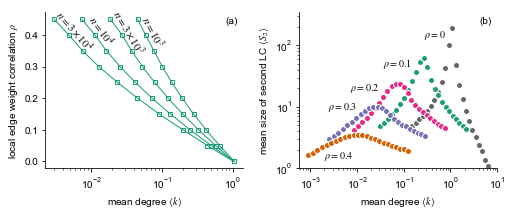

In [5]:
#some general settings
import matplotlib.pyplot as plt
#from bfmplot import pl as plt
import bfmplot as bp
fontsize=10
#plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('axes', labelsize=fontsize)
#%matplotlib inline

#color list and label
color_list = ["#52a7c4","#ff8956", "#fcc84e", "#9d65af", "#b2d689"]
color_dict = {1000:"#52a7c4", 3000:"#ff8956", 10000:"#fcc84e", 30000:"#9d65af", 100000:"#b2d689"}
label_dict = {1000:r"10^3", 3000:r"3\times 10^3", 10000:r"10^4", 30000:r"3 \times 10^4", 100000:r"10^5"}
color_list = bp.brewer_qualitative

#figure settings
width = 7.057
height = width/2.5
fig, axes = plt.subplots(1,2, figsize=(width, height))
plt.subplots_adjust(left=0.09, bottom=0.18, right=0.98, top=0.95, wspace=0.28, hspace=0)

#plot left panel
size_list = sorted(data_frame_GC.critical_threshold_dict.keys())
for size in size_list:
    d1 = data_frame_GC.critical_threshold_dict[size]
    covariance_list = sorted(list(d1.keys()))
    peak_list = [d1[covariance]["peak"] for covariance in covariance_list]
    mean_degree_peak_list = [get_mean_degree(size, t) for t in peak_list]

    axes[0].plot(mean_degree_peak_list, covariance_list,'-s', mfc='None',
                     label=r"$N = {}$".format(label_dict[size]), color=color_list[1])

#adjustments to the left panel
axes[0].set_xscale('log')
axes[0].set_xlabel(r"mean degree $\left< k \right>$")
axes[0].set_ylabel(r"local edge weight correlation $\rho$")
#axes[0].legend(frameon=False, fontsize=fontsize-1, handletextpad=0.4)
axes[0].text(0.97,0.97, r"(a)", fontsize=fontsize,transform=axes[0].transAxes,ha='right',
            va='top')
bp.strip_axis(axes[0])
isize = 0
for size in size_list:
    d1 = data_frame_GC.critical_threshold_dict[size]
    covariance_list = sorted(list(d1.keys()))
    peak_list = np.array([d1[covariance]["peak"] for covariance in covariance_list])
    mean_degree_peak_list = np.array([get_mean_degree(size, t) for t in peak_list])
    print(mean_degree_peak_list, covariance_list)
    bp.add_curve_label(axes[0],
                       mean_degree_peak_list[::-1], 
                       covariance_list[::-1], 
                       label=r"$n = {}$".format(label_dict[size]), 
                       label_pos_rel=0.001,
                       va = 'bottom',bbox_pad = 0,bbox_facecolor='none',
                       fontsize = fontsize+1,
                      )
    isize += 1

#plot right panel
size_list = [10000]
covariance_list = [0., 0.1, 0.2, 0.3, 0.4]
for size in size_list:
    d1 = data_frame_GC.measures_dict[size]
    icolor = 0
    for covariance in covariance_list:
        d2 = d1[covariance]
        threshold_list = [t for t in d2.keys()]
        mean_degree_list = np.array([get_mean_degree(size, t) for t in threshold_list])
        sort_index = np.argsort(mean_degree_list)
        mean_sec_lc_size_list = np.array([d2[t]["mean_sec_lc_size"] for t in d2.keys()])
        axes[1].loglog(mean_degree_list[sort_index], mean_sec_lc_size_list[sort_index], 'o',mec='w', 
                       label=r"$\rho = {}$".format(covariance), color=color_list[icolor], ms=6)
        icolor +=1

#adjustments to right panel
axes[1].set_ylim([1,350])
#axes[1].legend(frameon = False, ncol=1, fontsize=fontsize-1, handletextpad=0.1)
axes[1].set_xlabel(r"mean degree $\left< k \right>$")
axes[1].set_ylabel(r"mean size of second LC $\left < S_2 \right>$")
axes[1].text(0.97,0.97, r"(b)", fontsize=fontsize,transform=axes[1].transAxes,ha='right',
            va='top')

axes[1].text(0.8, 150, r'$\rho=0$',ha='right',va='center')
axes[1].text(0.15, 50, r'$\rho=0.1$',ha='right',va='center')
axes[1].text(0.03, 20, r'$\rho=0.2$',ha='right',va='center')
axes[1].text(0.01, 10, r'$\rho=0.3$',ha='right',va='center')
axes[1].text(2e-3, 2, r'$\rho=0.4$',ha='left',va='top')

#save and show

bp.strip_axis(axes[1])
plt.savefig('figs/giant_component_phase_diagram.pdf')
plt.show()

### Meta-information about the above figure

The only additional metadata I think is important for this figure is the fact that $10^3$ (largest network) to $10^4$ (smallest network) network samples from the model were used to perform the measures.

# Average shortest path figure

In [6]:
import pickle
data_frame_SP1 = pickle.load( open( "data/sp_data_1.p", "rb" ) )
data_frame_SP2 = pickle.load( open( "data/sp_data_2.p", "rb" ))
size = 10000 #size of the network used

[[0.17902488 0.21642983 0.24250593 ... 0.91961179 0.91765106 0.91519498]
 [0.18925631 0.22948072 0.25822001 ... 0.88457689 0.88217306 0.88065782]
 [0.20529461 0.24402369 0.2765495  ... 0.85447958 0.85280505 0.85064496]
 ...
 [0.3466653  0.3441945  0.34381624 ... 0.32701195 0.32594159 0.32660833]
 [0.3114354  0.31419594 0.31283957 ... 0.31010276 0.30999603 0.31043192]
 [0.27751462 0.28234677 0.28435384 ... 0.29750782 0.29759347 0.29773407]]
[0.62676442 0.12680302]
[ 2.13515183 -0.37362011]
[1.32429554 0.66518922]
[0.90045772 1.05746369]
[0.57269917 1.29331502]
[0.20565821 1.53296127]


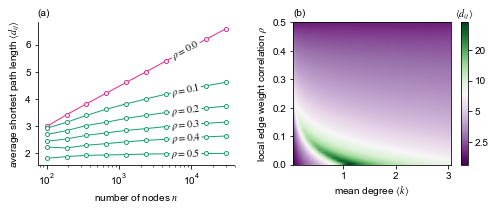

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.cm as cm

#general settings
fontsize=10
#plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('axes', labelsize=fontsize)
%matplotlib inline

#color list
color_list = ["#52a7c4","#ff8956", "#fcc84e", "#9d65af", "#b2d689"]
color_dict = {1000:"#52a7c4", 3000:"#ff8956", 10000:"#fcc84e", 30000:"#9d65af", 100000:"#b2d689"}

#create grid and values for the color map
covariance_list = sorted([float(c) for c in data_frame_SP1.measures_dict[size].keys()])
mean_degree_list = sorted([float(k) for k in data_frame_SP1.measures_dict[size][covariance_list[0]].keys()])
average_shortest_path_grid = \
[[float(data_frame_SP1.measures_dict[size][covariance][mean_degree]["average_shortest_path"])
    for mean_degree in mean_degree_list] for covariance in covariance_list]
#figure settings
width = 7.057
height = width/2.5
fig, axes = plt.subplots(1,2, figsize=(width, height))
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.98, top=0.9, wspace=0.3, hspace=0)
plt.sca(axes[1])

#plot left panel (colormap)
plt.imshow(np.log(average_shortest_path_grid)/np.log(10), interpolation='bilinear', aspect='auto',
           #cmap=cm.YlGnBu,
           cmap=cm.PRGn,
           #cmap='cividis',
                origin='lower', extent=[min(mean_degree_list), max(mean_degree_list), min(covariance_list), 
                    max(covariance_list)], #norm=matplotlib.colors.LogNorm(),
           #vmin = 1,
           #vmax = 50,
          )
clb = plt.colorbar(ticks=np.log10([2.5,5,10,20]))
#clb.ax.yaxis.set_minor_locator(matplotlib.ticker.AutoLocator())
#clb.ax.yaxis.set_major_locator(matplotlib.ticker.AutoLocator())
#clb.set_ticks(,)
clb.ax.set_yticklabels(['2.5','5','10','20'])
#clb.update_ticks()
print(np.log10(average_shortest_path_grid))

clb.ax.set_title(r'$\left<d_{ij} \right>$')

#adjustments on the left panel
axes[1].set_xlabel(r'mean degree $\left< k \right>$')
axes[1].set_ylabel(r'local edge weight correlation $\rho$')
axes[1].text(0.0,1.03, r"(b)", fontsize=fontsize,ha='left',va='bottom',transform=axes[1].transAxes)

#plot right panel
size_list = sorted([float(n) for n in data_frame_SP2.measures_dict.keys()])
covariance_list = sorted([float(c) for c in data_frame_SP2.measures_dict[size_list[0]].keys()])
icolor = 0
mean_degree = 5
for covariance in covariance_list:
    average_shortest_path_list = \
    [data_frame_SP2.measures_dict[size][covariance][mean_degree]["average_shortest_path"] 
     for size in size_list]
    if icolor == 0:
        icol = 2
        zweicol = 2
    else:
        icol = 1
        zweicol = 1
    if icolor>0:
        x = np.log(np.log(size_list))
        y = average_shortest_path_list
        params = np.polyfit(x,y,1)
        print(params)
        vals = np.polyval(params,x)
        #loglog, = axes[0].plot(size_list, vals,'-',lw=1,alpha=0.8,c=bp.brewer_qualitative[zweicol]) 
    else:
        x = np.log(size_list)
        y = average_shortest_path_list
        params = np.polyfit(x,y,1)
        print(params)
        vals = np.polyval(params,x)
        #log, = axes[0].plot(size_list, vals,'--',lw=1,alpha=0.8,c=bp.brewer_qualitative[zweicol]) 
    data, = axes[0].semilogx(size_list, average_shortest_path_list, "o-", mfc='w',
                     color=bp.brewer_qualitative[icol], label=r"$\rho = {}$".format(covariance))
    icolor +=1

#adjustments on the right panel
axes[0].text(0.0,1.03, r"(a)", fontsize=fontsize,transform=axes[0].transAxes,
             ha='left',
             va='bottom')
axes[0].set_xlabel(r'number of nodes $n$')
axes[0].set_ylabel(r'average shortest path length $\left< d_{ij} \right>$')
#axes[0].legend(frameon=False, fontsize=fontsize-1, ncol=1, handletextpad=0.4)
#axes[1].set_yscale('log')
bp.strip_axis(axes[0])
#axes[0].legend([data, log, loglog],['network samples','$\propto\log n$','$\propto\log\log n$'])

icolor = 0
for covariance in covariance_list:
    average_shortest_path_list = \
    [data_frame_SP2.measures_dict[size][covariance][mean_degree]["average_shortest_path"] 
     for size in size_list]
    

        

    bp.add_curve_label(axes[0], size_list, average_shortest_path_list,
                       r'$\rho={:3.1f}$'.format(covariance),
                       label_pos_rel = 0.75,
                       #va='bottom',bbox_pad=0.0,
                      )
        
    icolor +=1

#save and show
plt.savefig('figs/average_shortest_path.png', dpi=400)


### Meta-information about the above figure

For the left panel : Networks with $10^4$ nodes were used. For each couple $(\rho,\left< k\right >)$, 200 network samples were used. <br>
For the right panel : A mean degree $\left < k \right> = 5$ has been used, and again 200 network samples were used for each case.